# Introduction

This Python 3 environment comes with many helpful analytics libraries installed
It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
For example, here's several helpful packages to load

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as pp
from preprocessor import Preprocessor
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

df_train: pd.DataFrame = pd.read_csv("./input/train.csv")
df_test: pd.DataFrame = pd.read_csv("./input/test.csv")

df_train.describe()
print(df_train.info())
print(df_train.head(10))
print(df_train.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         

# Preprocessing (siehe Preprocessor)

In [2]:
X_y, X, y = Preprocessor().fit_transform(df_train)
X_np, y_np = X.to_numpy(), y.to_numpy()

X_y.info()
X_y.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887 entries, 0 to 890
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Survived          887 non-null    int64  
 1   Pclass            887 non-null    int64  
 2   Age               887 non-null    float64
 3   SibSp             887 non-null    int64  
 4   Parch             887 non-null    int64  
 5   Fare              887 non-null    float64
 6   Deck_cat          887 non-null    int64  
 7   Deck_cat_missing  887 non-null    bool   
 8   Title_cat         887 non-null    Int64  
 9   Sex_cat           887 non-null    Int64  
 10  Embarked_cat      887 non-null    Int64  
dtypes: Int64(3), bool(1), float64(2), int64(5)
memory usage: 79.7 KB


,Survived,Pclass,Age,SibSp,Parch,Fare,Deck_cat,Deck_cat_missing,Title_cat,Sex_cat,Embarked_cat
0,0,3,22.0,1,0,7.2500,5,True,11,1,2
1,1,1,38.0,1,0,71.2833,2,False,12,0,0
2,1,3,26.0,0,0,7.9250,5,True,8,0,2
3,1,1,35.0,1,0,53.1000,2,False,12,0,2
4,0,3,35.0,0,0,8.0500,5,True,11,1,2
5,0,3,28.0,0,0,8.4583,5,True,11,1,1
6,0,1,54.0,0,0,51.8625,4,False,11,1,2
7,0,3,2.0,3,1,21.0750,5,True,7,1,2
8,1,3,27.0,0,2,11.1333,5,True,12,0,2
9,1,2,14.0,1,0,30.0708,4,True,12,0,0


# Korrelations Matrix
Anfangs erkennen zwischen welchen Features hohe  Korrelationen zu erwarten sind und diese sich genauer ansehen

In [3]:
corr_matrix: pd.DataFrame = X_y.corr()
corr_matrix


,Survived,Pclass,Age,SibSp,Parch,Fare,Deck_cat,Deck_cat_missing,Title_cat,Sex_cat,Embarked_cat
Survived,1.000000,-0.332577,-0.074376,-0.035348,0.084686,0.254861,-0.279829,-0.309904,-0.210264,-0.542407,-0.165162
Pclass,-0.332577,1.000000,-0.333021,0.083435,0.015189,-0.548655,0.897070,0.722058,0.035526,0.127159,0.158922
Age,-0.074376,-0.333021,1.000000,-0.234609,-0.170368,0.092850,-0.296209,-0.230857,0.294081,0.087790,-0.014565
SibSp,-0.035348,0.083435,-0.234609,1.000000,0.415195,0.160629,0.082270,0.040616,-0.201418,-0.116225,0.071103
Parch,0.084686,0.015189,-0.170368,0.415195,1.000000,0.217969,0.011007,-0.041242,-0.128466,-0.248239,0.038548
Fare,0.254861,-0.548655,0.092850,0.160629,0.217969,1.000000,-0.567000,-0.480992,-0.088819,-0.180410,-0.225882
Deck_cat,-0.279829,0.897070,-0.296209,0.082270,0.011007,-0.567000,1.000000,0.679741,0.068100,0.092563,0.213048
Deck_cat_missing,-0.309904,0.722058,-0.230857,0.040616,-0.041242,-0.480992,0.679741,1.000000,0.054822,0.134990,0.156497
Title_cat,-0.210264,0.035526,0.294081,-0.201418,-0.128466,-0.088819,0.068100,0.054822,1.000000,0.264996,0.066950
Sex_cat,-0.542407,0.127159,0.087790,-0.116225,-0.248239,-0.180410,0.092563,0.134990,0.264996,1.000000,0.109567


# Categorial plots

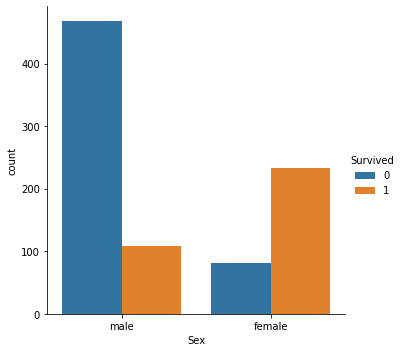

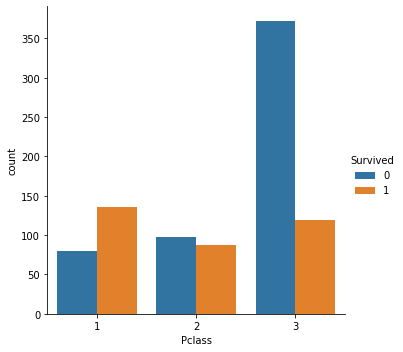

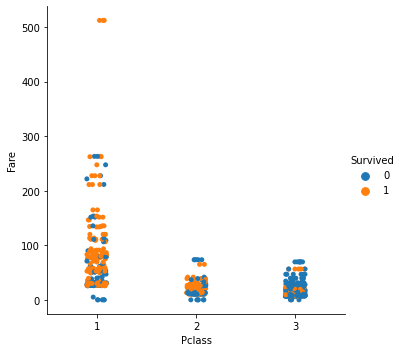

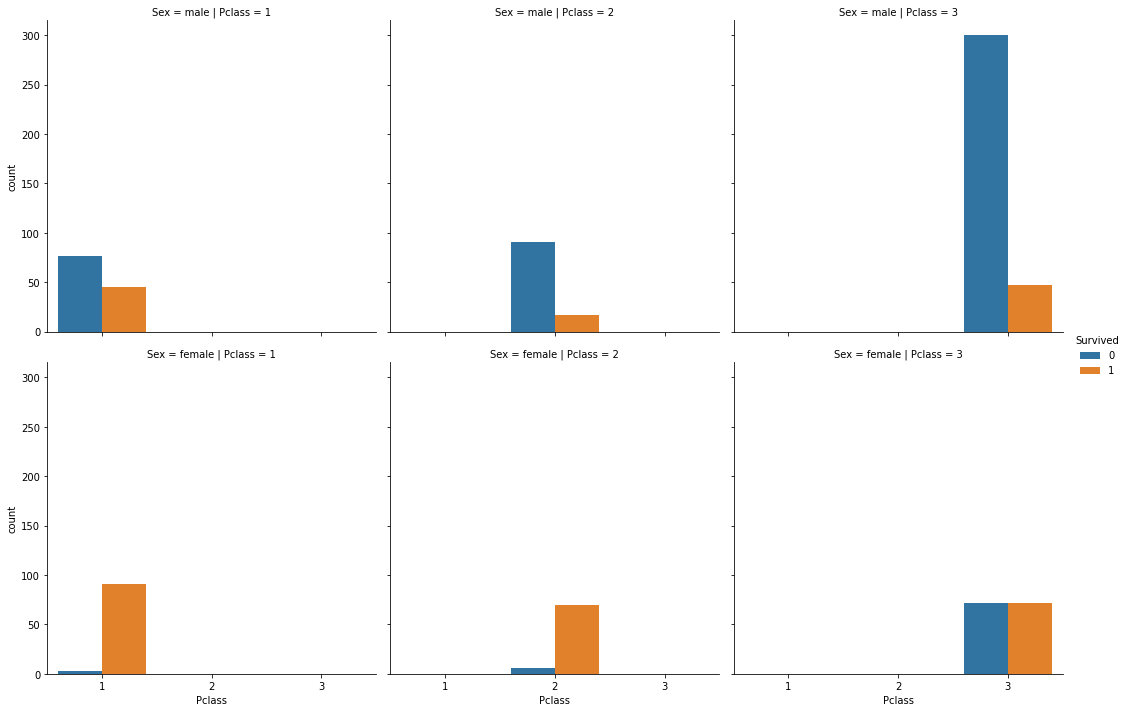

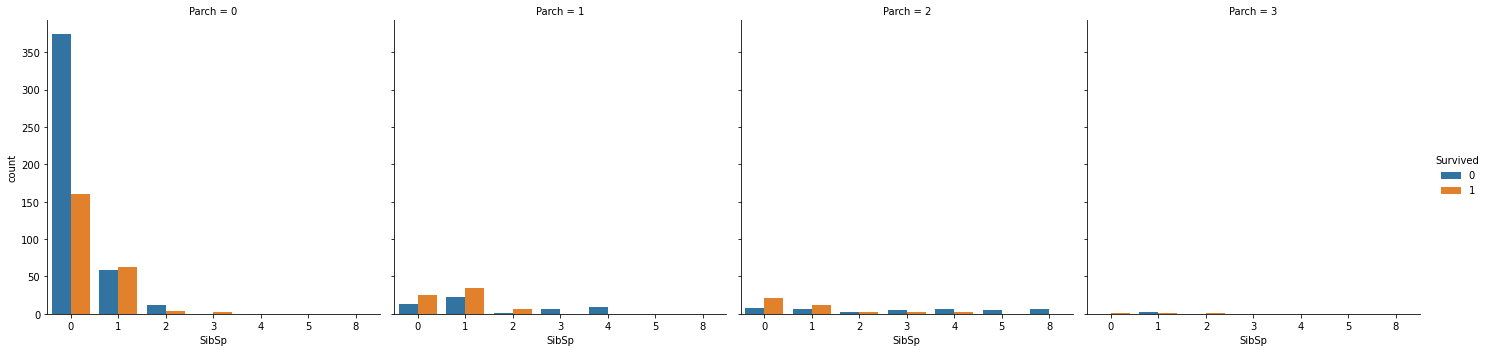

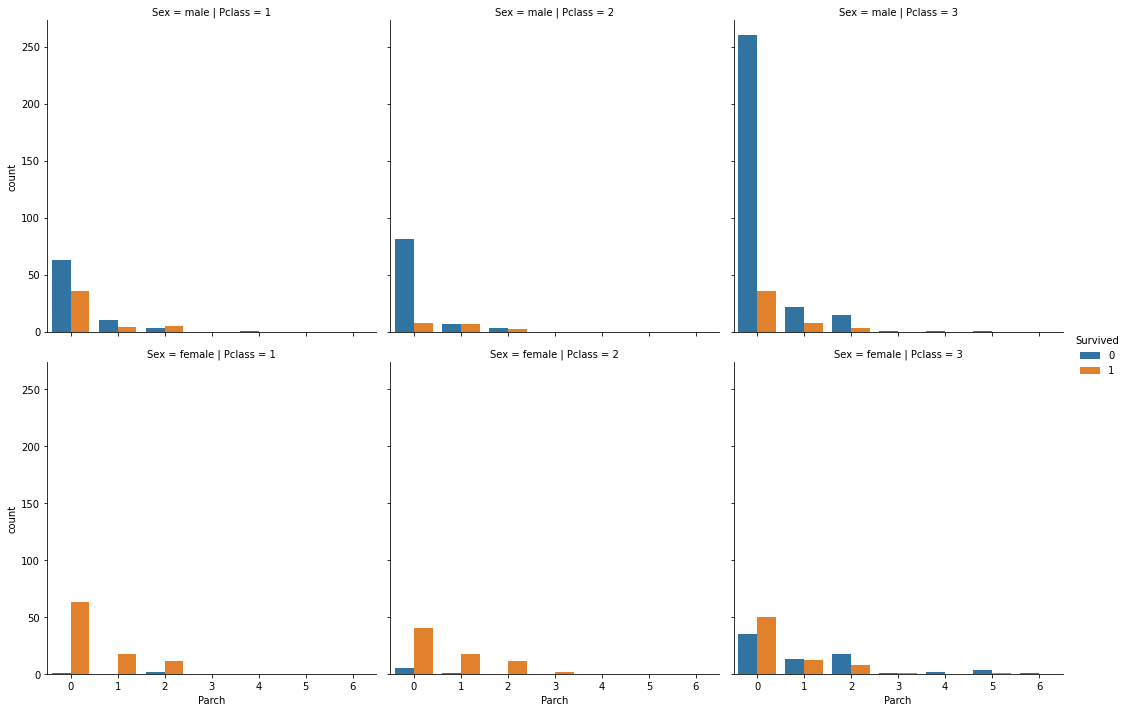

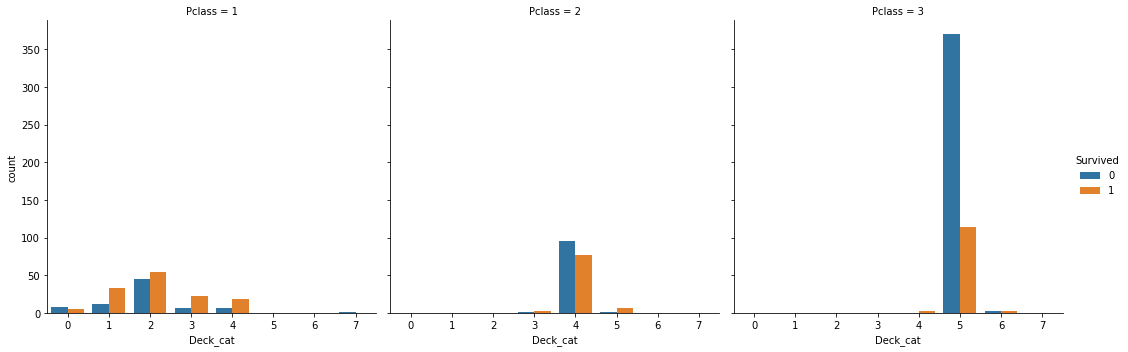

In [4]:
# sns.countplot(x='Sex', hue='Survived', data=df_train)
sns.catplot(x='Sex', hue='Survived', data=df_train, kind='count')
pp.show()
sns.catplot(x='Pclass', hue='Survived', data=df_train, kind='count')
pp.show()
sns.catplot(x='Pclass', hue='Survived', y='Fare', data=df_train)
pp.show()
sns.catplot(x='Pclass', hue='Survived', row='Sex', col='Pclass', data=df_train, kind='count')
pp.show()

sns.catplot(x='SibSp', col='Parch', hue='Survived', data=X_y[X_y["Parch"] < 4], kind='count')
pp.show()

sns.catplot(x='Parch', hue='Survived', row='Sex', col='Pclass', data=df_train, kind='count')
pp.show()

sns.catplot(x='Deck_cat', hue='Survived', col='Pclass', data=X_y, kind='count')
pp.show()

#sns.histplot(x='Age', hue='Survived', data=df_train, binwidth=5.0)
#sns.displot(x='Age', hue='Survived', col='Survived', data=df_train)
#pp.show()

# Distribution plots

## By age

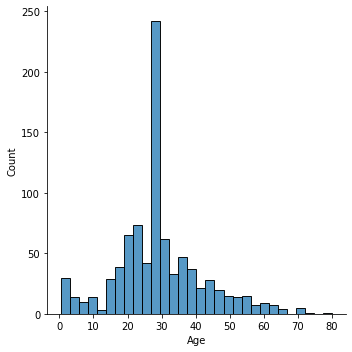

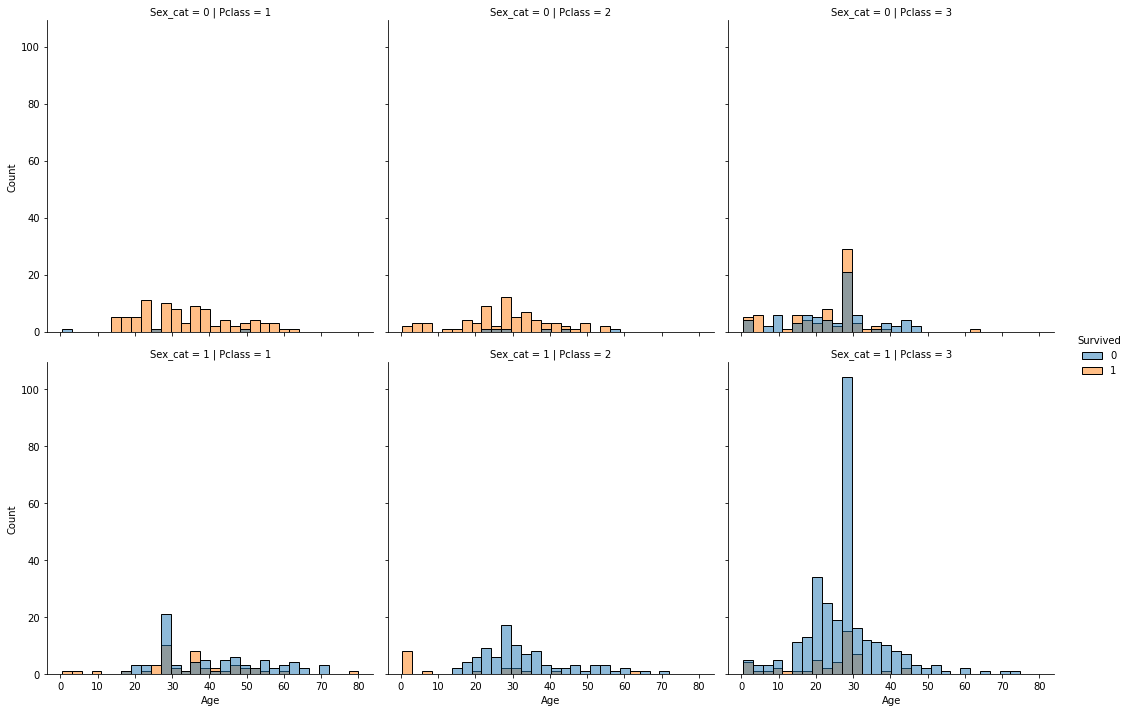

In [5]:
sns.displot(x='Age', data=X_y)
pp.show()

sns.displot(x='Age', hue='Survived', col='Pclass', row='Sex_cat', data=X_y)
pp.show()

## By fare

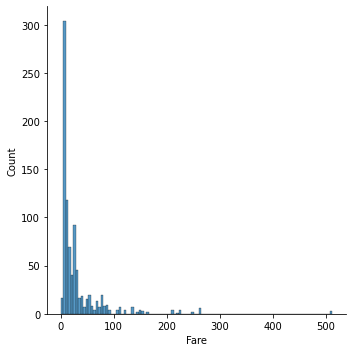

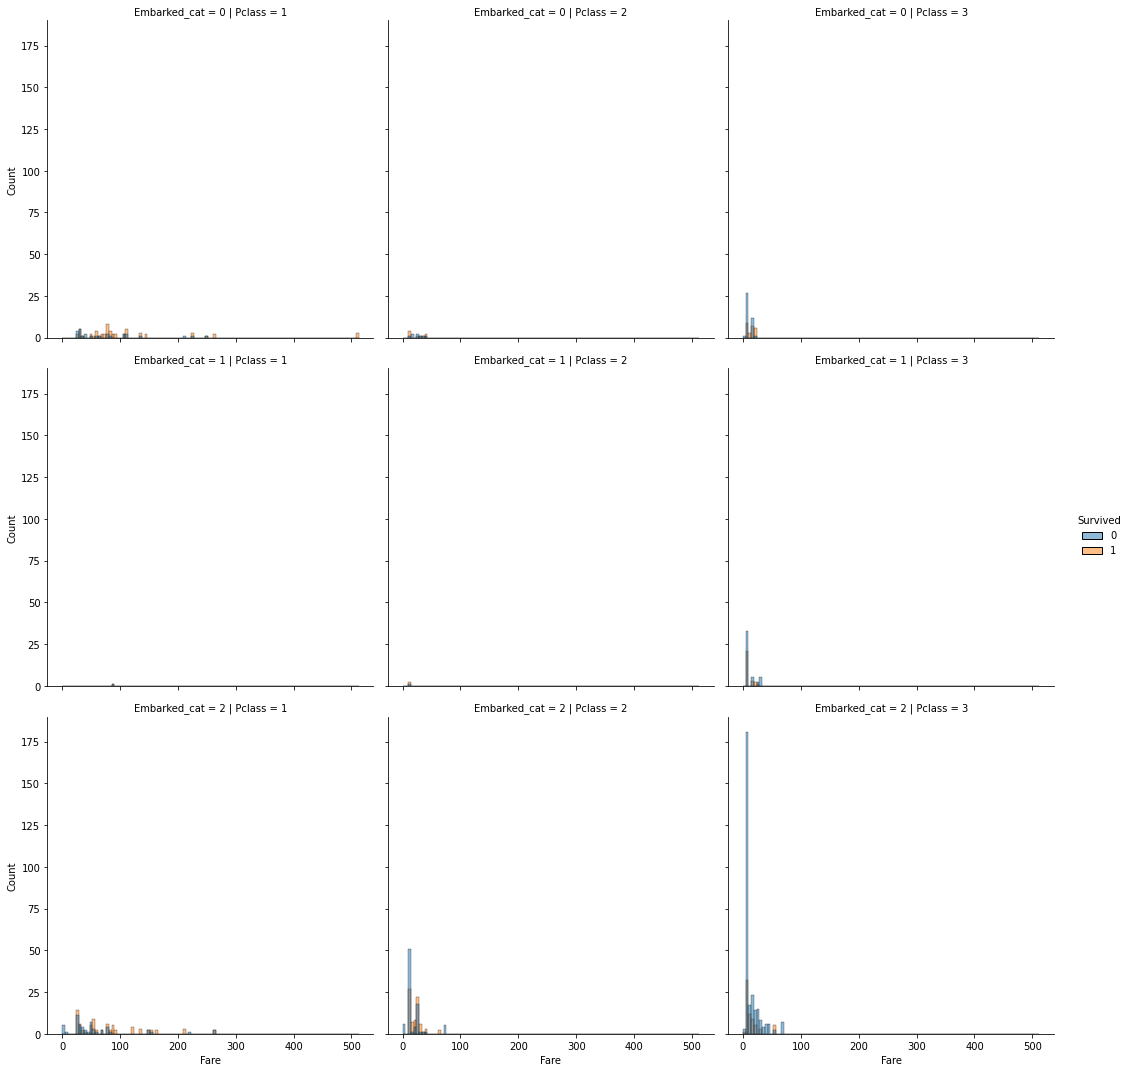

In [6]:
sns.displot(x='Fare', data=X_y)
pp.show()


sns.displot(x='Fare', hue='Survived', col='Pclass', row="Embarked_cat", data=X_y)
pp.show()


In [7]:
# Numeric features: Find pairwise linear dependencies with pair plots in

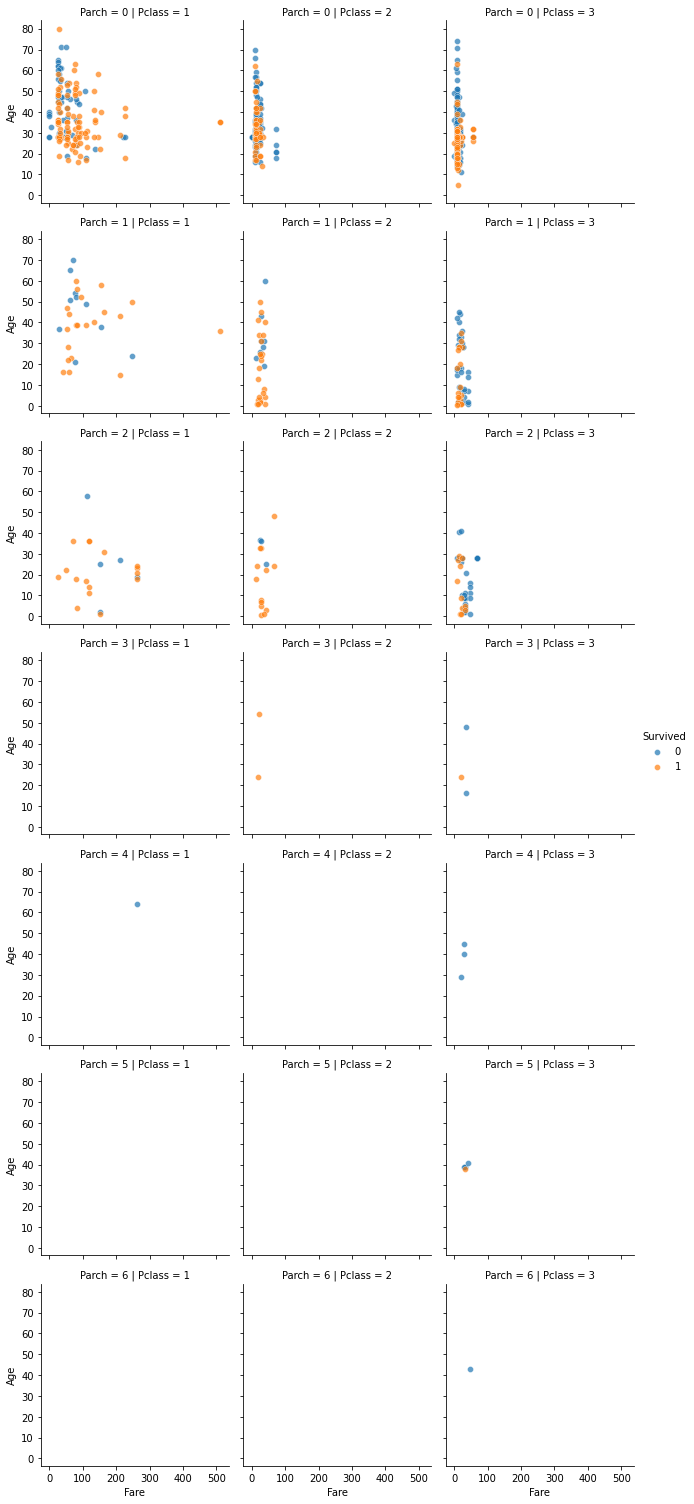

In [8]:
g = sns.FacetGrid(X_y, col="Pclass", row="Parch", hue="Survived")
g.map(sns.scatterplot, "Fare", "Age", alpha=.7)
g.add_legend()


# DecisionTree: Create train and test data from train data set

DecisionTreeClassifier(max_depth=5, max_features=3, random_state=42)

0.8365276211950394

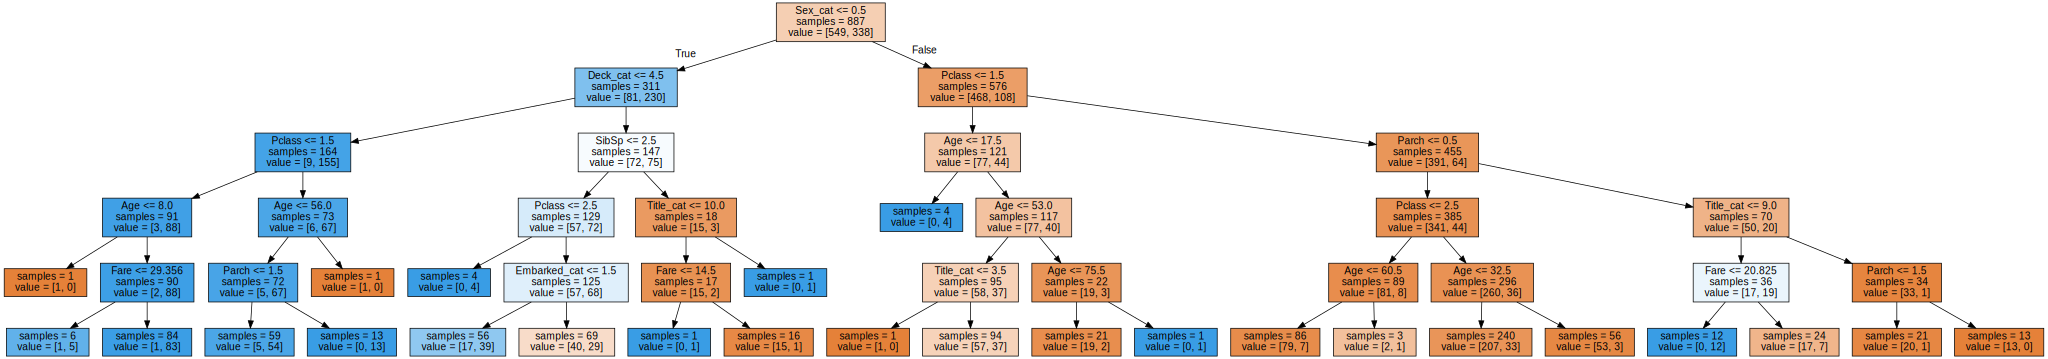

0.8185393258426965

0.04951222968162832

In [9]:
from visu import plot_classifier as plot_clf, plot_clf_file
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score

# drop columns
X_y, X, y = Preprocessor().fit_transform(df_train)
X_np, y_np = X.to_numpy(), y.to_numpy()

clf: DecisionTreeClassifier = DecisionTreeClassifier(random_state=42,
                                                     max_depth=5,
                                                     max_features=3)
clf.fit(X_np, y_np)
clf.score(X_np, y_np)

# plot_clf(clf=clf, feature_names=[i for i in X.columns])
plot_clf_file(clf, feature_names=[c for c in X.columns])

scores = cross_val_score(clf, cv=10, X=X_np, y=y_np, scoring=make_scorer(accuracy_score))
scores.mean()
scores.std()


# RandomForest: Create train and test data from train data set

In [10]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score

X_y, X, y = Preprocessor().fit_transform(df_train)

X_np, y_np = X.to_numpy(), y.to_numpy()

n_max_features = int(np.sqrt(X.columns.size))


clf = RandomForestClassifier(n_estimators=1000, max_features=n_max_features, random_state=42, min_samples_split=2)

clf.fit(X_np, y_np).score(X_np, y_np)

scores = cross_val_score(clf, cv=5, X=X_np, y=y_np, scoring=make_scorer(accuracy_score))
scores.mean()
scores.std()

0.9842164599774521

0.810626547324319

0.038757845496013535

Random forest: Grid search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score

X_y, X, y = Preprocessor(engineer_title=True, engineer_deck=True).fit_transform(df_train)
X_np, y_np = X.to_numpy(), y.to_numpy()

param_grid = [
    {'n_estimators': [10, 100, 200], 'max_features': list(range(2, X_np.shape[1]))},
    {'bootstrap': [False], 'n_estimators': [10, 100, 200],
     'max_features': list(range(2, X_np.shape[1]))}]

clf = RandomForestClassifier()

grid_search = GridSearchCV(clf, param_grid, cv=5,
                           scoring=make_scorer(accuracy_score),
                           return_train_score=True,
                           n_jobs=2)
grid_search.fit(X=X_np, y=y_np)

cvres = grid_search.cv_results_
for mean_score, mean_train_score, params in zip(cvres["mean_test_score"],cvres["mean_train_score"],
                                  cvres["params"]):
    print(mean_score, mean_train_score, params)

cvres['mean_test_score'].max()